In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import find_sum_of_values

plt.xkcd()

In [2]:
data = pd.read_csv('../data/2016-08-08-last-year.xz',
                   parse_dates=[16],
                   dtype={'document_id': np.str,
                          'congressperson_id': np.str,
                          'congressperson_document': np.str,
                          'term_id': np.str,
                          'cnpj_cpf': np.str,
                          'reimbursement_number': np.str})

In [3]:
meals = data[data['subquota_description']=='Congressperson meal']
meals.head()

,document_id,congressperson_name,congressperson_id,congressperson_document,term,state,party,term_id,subquota_number,subquota_description,...,net_value,month,year,installment,passenger,leg_of_the_trip,batch_number,reimbursement_number,reimbursement_value,applicant_id
142,5844658,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,13,Congressperson meal,...,62.69,10,2015,0,NaN,NaN,1242398,5230,NaN,3074
143,5832140,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,13,Congressperson meal,...,121.50,10,2015,0,NaN,NaN,1238293,5212,NaN,3074
144,5844722,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,13,Congressperson meal,...,50.53,11,2015,0,NaN,NaN,1242398,5230,NaN,3074
554,5805588,ADAIL CARNEIRO,178864,92,2015,CE,PP,55,13,Congressperson meal,...,150.40,9,2015,0,NaN,NaN,1230823,5177,NaN,3016
555,5713563,ADAIL CARNEIRO,178864,92,2015,CE,PP,55,13,Congressperson meal,...,90.50,6,2015,0,NaN,NaN,1202595,5066,NaN,3016


In [4]:
infos = {}

infos['total_spent'] = meals['net_value'].sum()

/home/leportella/anaconda3/envs/serenata/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


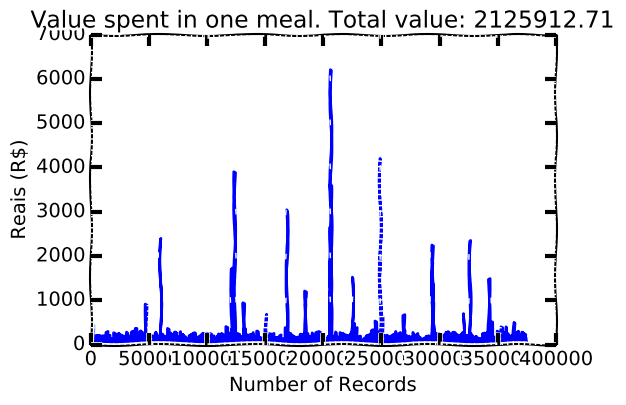

In [5]:
plt.plot(meals['net_value'])
plt.title('Value spent in one meal. Total value: {}'. format(infos['total_spent']))
plt.ylabel('Reais (R$)')
plt.xlabel('Number of Records')
plt.grid()

#  List of annual expenditures on meals by congress person

The 5 congress person with the most value of expenditures during the year have spent, in one lunch, more than R$ 2000,00

Attention! Ids can be nan from party expenses!

You can't use ids to get unique values

In [6]:
sum_per_person = find_sum_of_values(meals, 'congressperson_name', 'net_value')

if (sum_per_person['net_value_total'].sum() - infos['total_spent']) == 0:
    print('Values are ok!')
    
sum_per_person.head()

,congressperson_name,net_value_max,net_value_mean,net_value_min,net_value_total,occurences
0,ABEL MESQUITA JR.,121.5,78.000000,50.53,234,3
1,ADAIL CARNEIRO,200.0,30.413174,3.00,5079,167
2,ADALBERTO CAVALCANTI,157.0,62.764706,28.00,1067,17
3,ADELMO CARNEIRO LEÃO,435.6,43.197368,10.46,3283,76
4,ADEMIR CAMILO,207.7,41.851351,6.00,6194,148


In [7]:
infos['mean_value_spent'] = np.mean(sum_per_person['net_value_total'])
infos['max_value_spent'] = np.max(sum_per_person['net_value_total'])
infos['min_value_spent'] = np.min(sum_per_person['net_value_total'])
infos['min_value_spent_by'] = sum_per_person['congressperson_name'][sum_per_person['net_value_total'] == infos['min_value_spent']]
infos['max_value_spent_by'] = sum_per_person['congressperson_name'][sum_per_person['net_value_total'] == infos['max_value_spent']]

print('Mean value spent on meals: {}'.format(infos['mean_value_spent']))
print('Max value spent on meals: {}'.format(infos['max_value_spent']))
print('Max value spent on meals by: {}'.format(infos['max_value_spent_by']))
print('---')
print('Min value spent on meals: {}'.format(infos['min_value_spent']))
print('Min value spent on meals by: {}'.format(infos['min_value_spent_by']))

Mean value spent on meals: 4302.967611336032
Max value spent on meals: 58471
Max value spent on meals by: 271    LIDERANÇA DO PT
Name: congressperson_name, dtype: object
---
Min value spent on meals: 10
Min value spent on meals by: 29       AMIR LANDO
195    HELCIO SILVA
Name: congressperson_name, dtype: object


In [8]:
sum_per_person.sort_values(by='net_value_total', ascending=False)[0:10]

,congressperson_name,net_value_max,net_value_mean,net_value_min,net_value_total,occurences
271,LIDERANÇA DO PT,6205.00,536.431193,3.50,58471,109
270,LIDERANÇA DO PSDB,2640.00,761.433962,30.80,40356,53
407,ROGÉRIO PENINHA MENDONÇA,277.31,86.243169,8.00,31565,366
398,ROBERTO FREIRE,277.30,97.883281,8.40,31029,317
385,PROS,2244.90,679.710526,55.12,25829,38
368,PAULÃO,200.00,74.603834,3.40,23351,313
284,LUIZ CARLOS RAMOS,254.43,66.634783,4.20,22989,345
441,SIMÃO SESSIM,145.04,59.685039,7.50,22740,381
42,ANTONIO BULHÕES,194.59,91.246809,16.00,21443,235
491,ZECA DIRCEU,279.34,50.772727,1.50,21223,418


/home/leportella/anaconda3/envs/serenata/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


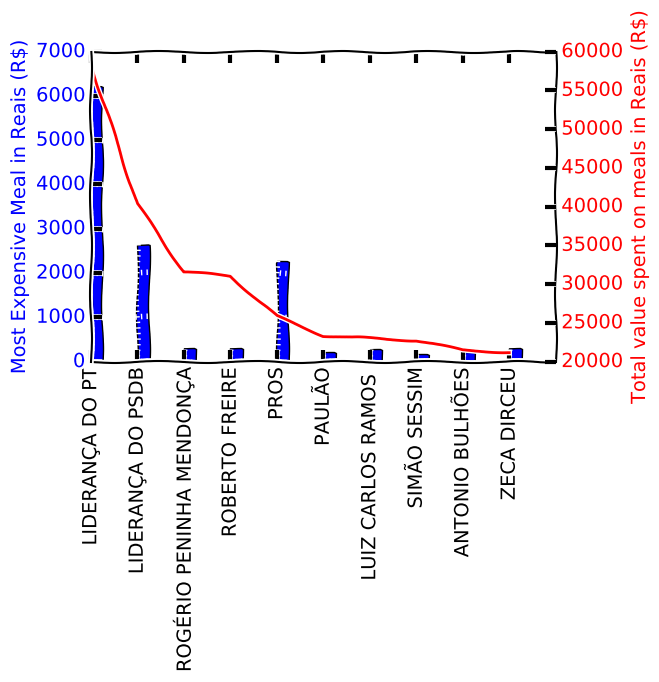

In [9]:
first_ten = sum_per_person.sort_values(by='net_value_total', ascending=False)[0:10]

major_ticks = first_ten['congressperson_name']

fig, ax1 = plt.subplots()

ax1.bar(range(10), first_ten['net_value_max'], 0.25)
ax1.set_ylabel('Most Expensive Meal in Reais (R$)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
   
ax2 = ax1.twinx()
ax2.set_ylabel('Total value spent on meals in Reais (R$)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.plot(range(10), first_ten['net_value_total'],'r')

ax1.set_xticks(range(10))
ax1.set_xticklabels(first_ten['congressperson_name'], rotation='vertical')
ax1.grid()

#  List of annual expenditures on meals by month

In [10]:
sum_by_month = find_sum_of_values(meals, 'month', 'net_value')

sum_by_month

,month,net_value_max,net_value_mean,net_value_min,net_value_total,occurences
11,1,4200.00,80.390863,3.50,95022,1182
6,2,1600.00,69.457483,0.00,163364,2352
7,3,2034.00,62.888974,0.00,245267,3900
9,4,2943.65,63.643120,0.00,207222,3256
8,5,3609.99,62.182900,0.00,224729,3614
3,6,3617.41,60.587359,1.99,166797,2753
4,7,3887.00,60.458858,3.50,144013,2382
5,8,4178.65,59.768098,0.00,190720,3191
2,9,3900.00,61.666039,0.00,196468,3186
0,10,5054.99,62.423655,0.00,186834,2993


/home/leportella/anaconda3/envs/serenata/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


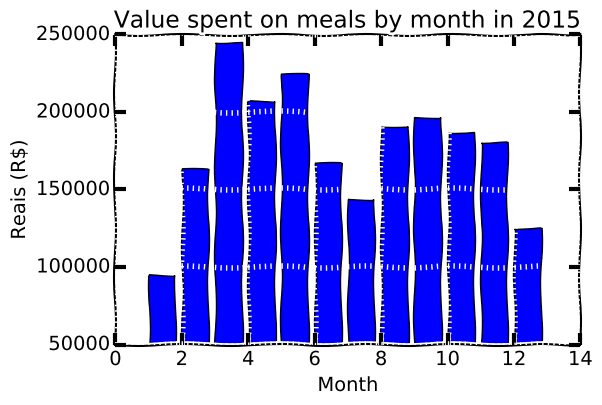

In [11]:
plt.bar(sum_by_month['month'], sum_by_month['net_value_total'])
plt.title('Value spent on meals by month in 2015')
plt.ylabel('Reais (R$)')
plt.xlabel('Month')
plt.ylim(50000, 250000)
plt.grid()


#  List of annual expenditures on meals by party

In [12]:
sum_per_party = find_sum_of_values(meals, 'party', 'net_value')

sum_per_party.sort_values(by='net_value_total', ascending=False)[0:10]

,net_value_max,net_value_mean,net_value_min,net_value_total,occurences,party
9,4200.00,64.800538,0.00,265099,4091,PMDB
3,435.60,49.468080,1.50,198367,4010,PT
16,3041.80,48.217942,0.00,182746,3790,PSDB
1,674.16,51.183955,2.00,174179,3403,PP
0,381.92,73.042906,0.01,149811,2051,DEM
6,911.22,56.609011,0.00,148259,2619,PR
5,3900.00,61.636539,2.50,127526,2069,PSB
7,297.00,70.556733,1.00,113173,1604,PDT
10,697.00,71.567037,2.50,109426,1529,PPS
8,272.25,66.118528,0.00,105988,1603,PRB


/home/leportella/anaconda3/envs/serenata/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


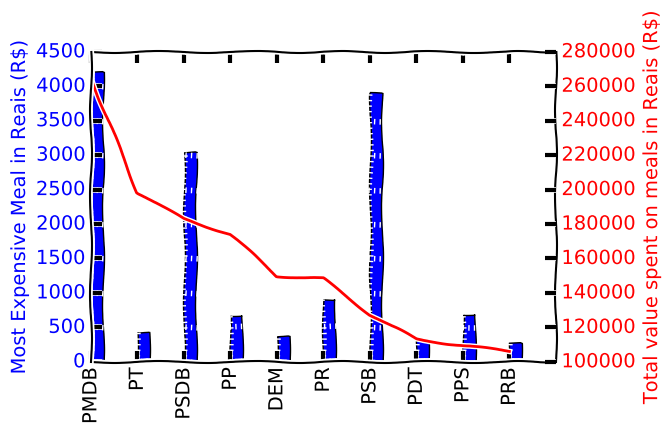

In [14]:
first_ten = sum_per_party.sort_values(by='net_value_total', ascending=False)[0:10]

major_ticks = first_ten['party']

fig, ax1 = plt.subplots()

ax1.bar(range(10), first_ten['net_value_max'], 0.25)
ax1.set_ylabel('Most Expensive Meal in Reais (R$)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
   
ax2 = ax1.twinx()
ax2.set_ylabel('Total value spent on meals in Reais (R$)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.plot(range(10), first_ten['net_value_total'],'r')

ax1.set_xticks(range(10))
ax1.set_xticklabels(first_ten['party'], rotation='vertical')
ax1.grid()